## Import and Key Findings on Dataset

In [1]:
#Libraries
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from graphviz import Digraph

from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read CSV file
df_1 = pd.read_csv('glass_data.csv')
df_1

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#Understand categories
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [4]:
#Understand columns rows
df_1.shape

(214, 11)

## Check for null values

In [5]:
#Check for null values
df_1.isnull().sum()

id      0
ri      0
na      0
mg      0
al      0
si      0
k       0
ca      0
ba      0
fe      0
type    0
dtype: int64

In [6]:
# Describe the data
df_1.describe()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
# values less than 0
minus = df_1 < 0
print(df_1[minus.any(axis=1)])

Empty DataFrame
Columns: [id, ri, na, mg, al, si, k, ca, ba, fe, type]
Index: []


## Check for values in the categorical column

In [8]:
df_1['type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

## Check for duplicated rows

In [9]:
df_1.duplicated().sum()

0

## Check for 0 values

In [10]:
# Min value is 0.00, check for 0.00 values
df_zero = (df_1 == 0).sum()

In [11]:
df_zero

id        0
ri        0
na        0
mg       42
al        0
si        0
k        30
ca        0
ba      176
fe      144
type      0
dtype: int64

In [12]:
# Check percentage of 0 values
zero_percentage = (df_1 == 0).mean() * 100
print(zero_percentage)

id       0.000000
ri       0.000000
na       0.000000
mg      19.626168
al       0.000000
si       0.000000
k       14.018692
ca       0.000000
ba      82.242991
fe      67.289720
type     0.000000
dtype: float64


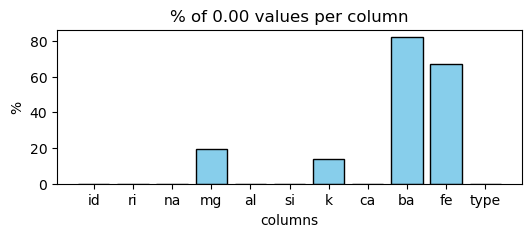

In [13]:
#Graph %
plt.figure(figsize=(6,2))
plt.bar(zero_percentage.index, zero_percentage, color='skyblue', edgecolor='black')

plt.title('% of 0.00 values per column')
plt.xlabel('columns')
plt.ylabel('%')

plt.show()


## Check for correlation

type    1.000000
id      0.896310
al      0.591198
ba      0.577676
na      0.506424
si      0.149691
ca     -0.008998
k      -0.025835
ri     -0.168739
fe     -0.183207
mg     -0.728160
Name: type, dtype: float64


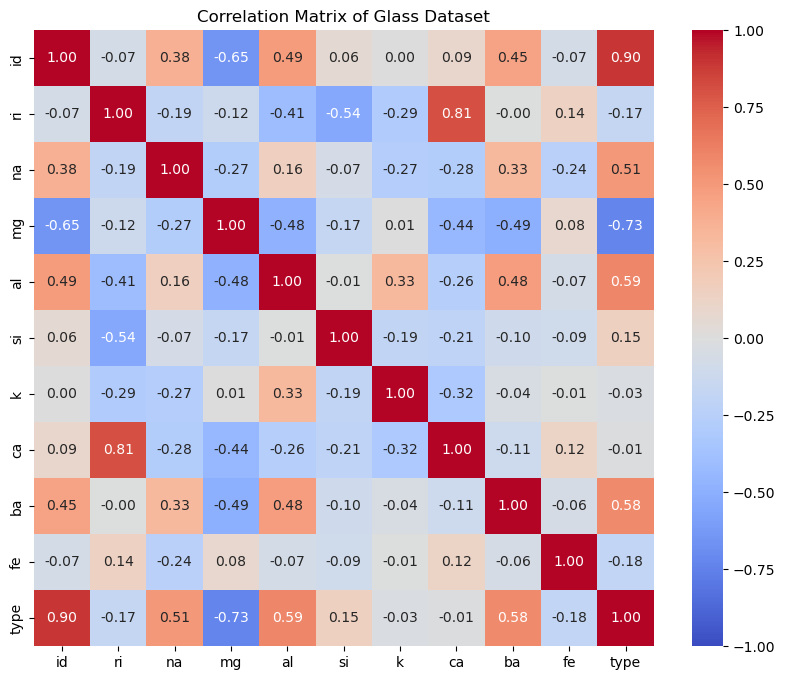

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_1['type'] = label_encoder.fit_transform(df_1['type'])

# Calculate the correlation matrix for the entire dataset
correlation_matrix = df_1.corr()

# Extract correlation with 'Type of glass' specifically
correlation_with_target = correlation_matrix['type'].sort_values(ascending=False)

# Display the correlation with 'Type of glass'
print(correlation_with_target)

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Glass Dataset')
plt.show()

## Drop ID / BA column

In [15]:
df_1.drop(columns=['id','ba'], inplace=True)

In [16]:
df_1.head()

,ri,na,mg,al,si,k,ca,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0


## Check for outliers in each column

In [17]:
## The outliers are correct data, so I will only search for extreme outliers
# Identifying extreme outliers using Inter Quartile Range (using 3 *IQR as this would be extreme)
# Create an empty dictionary to store the outliers
outliers = {}

# Loop through each column to calculate IQR and identify extreme outliers
for column in df_1.columns:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]
   
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)


ri
lower bound: 1.5086175000000002
upper bound: 1.5270624999999998
Outliers in ri:
          ri     na    mg    al     si     k     ca    fe  type
103  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00     1
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  0.28     1
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.24     1
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00     1
112  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00     1
--------------------------------------------------
na
lower bound: 10.155000000000005
upper bound: 16.577499999999993
Outliers in na:
          ri     na   mg    al     si    k    ca   fe  type
184  1.51115  17.38  0.0  0.34  75.41  0.0  6.65  0.0     4
--------------------------------------------------
mg
lower bound: -2.340000000000001
upper bound: 8.055000000000001
Outliers in mg:
Empty DataFrame
Columns: [ri, na, mg, al, si, k, ca, fe, type]
Index: []
--------------------------------------------------
al
lower bound: -0.129

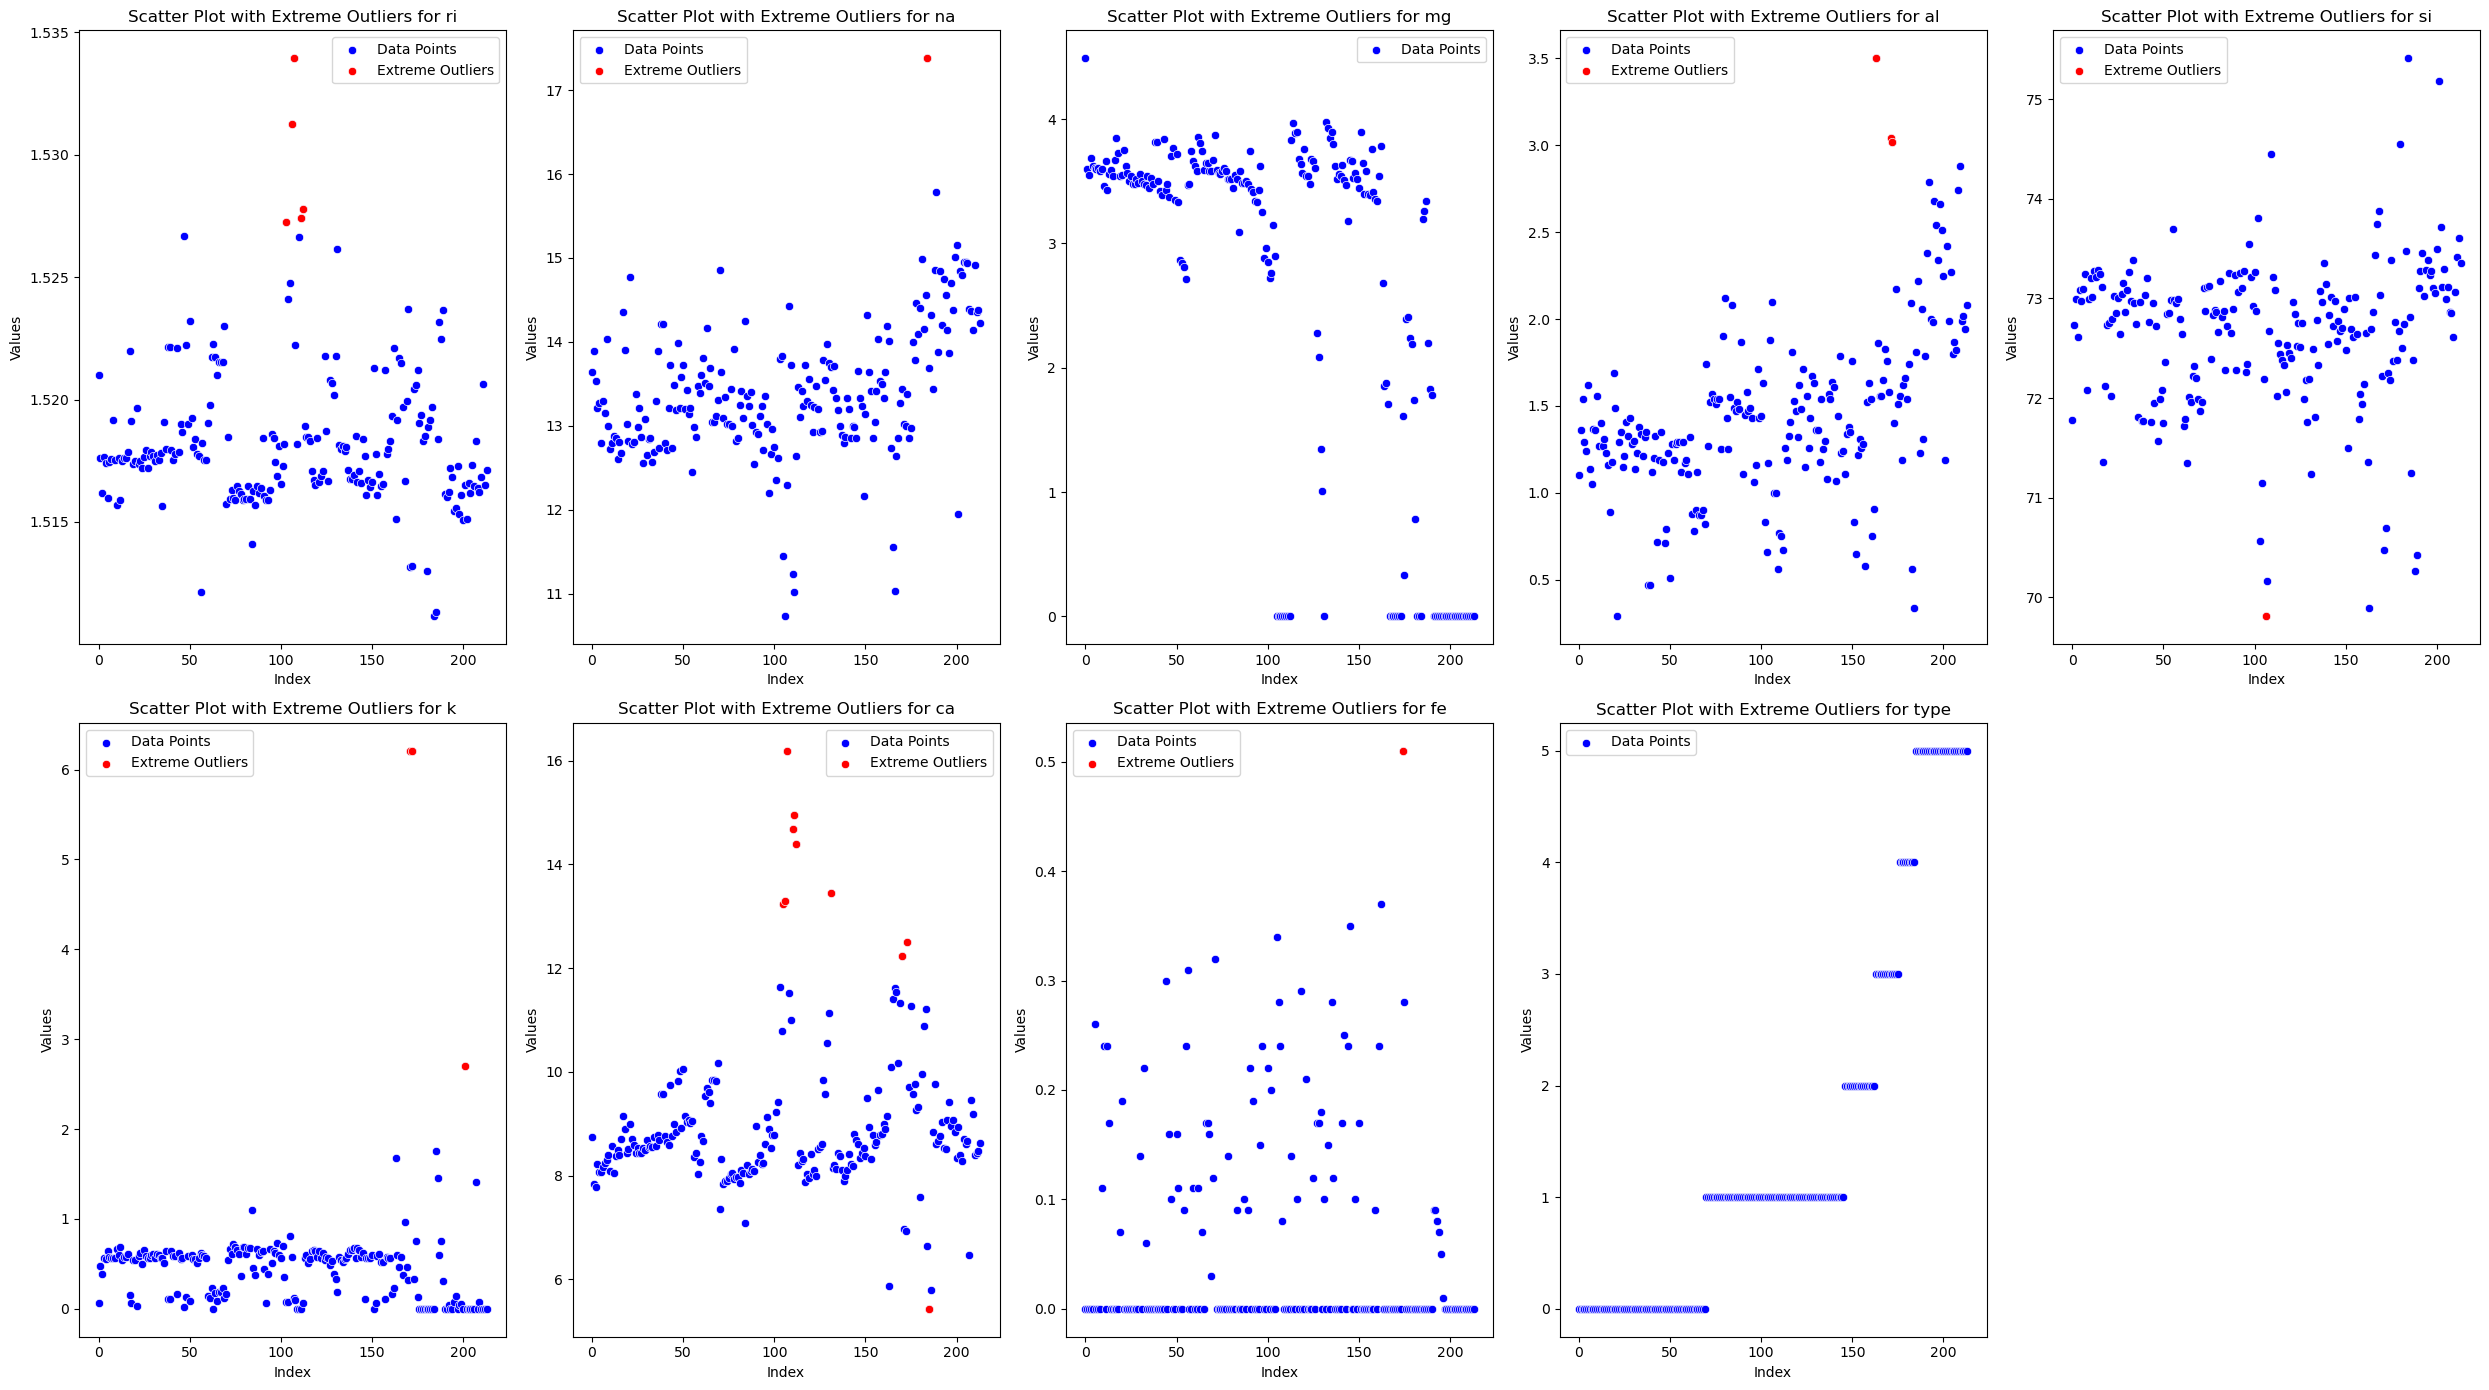

In [18]:
# create scatter plots for all columns to show extreme outliers
plt.figure(figsize=(25,14))
           
for i, column in enumerate(df_1.columns):
    # 2 rows, 5 columns
    plt.subplot(2, 5, i+1)
    sns.scatterplot(x= df_1.index, y = df_1[column], color='blue', label='Data Points')
    
    #Extrem Outliers in red
    sns.scatterplot(x=outliers[column].index, y=outliers[column][column], color='red', label='Extreme Outliers')
    plt.title(f"Scatter Plot with Extreme Outliers for {column}")
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()

plt.tight_layout()
plt.show()

## Check Skewness to know whether to use median or mean when replacing outliers

In [19]:
# Check skewness
# skewness > 0, right-skewed / positive
# skewness < 0, left-skewed / negative
# skewness = 0, symmetric

# -0.5 to +0.5 - approx symmetric = mean
# -1 to +1 - moderate skewed = mean
# >1 - substantial skewed = median
# >2 - highly skewed = median

from scipy.stats import skew

#Create storage for skewness
skew_df = {}

# Loop each column for skewness
for columns in df_1.columns:
    #calculate skewness
    col_skew = skew(df_1[columns])
    #Add to dict
    skew_df[columns] = col_skew
    #print
    print(f"skewness for {columns}: {col_skew:.3f}")
    


skewness for ri: 1.614
skewness for na: 0.451
skewness for mg: -1.144
skewness for al: 0.901
skewness for si: -0.725
skewness for k: 6.506
skewness for ca: 2.033
skewness for fe: 1.742
skewness for type: 1.045


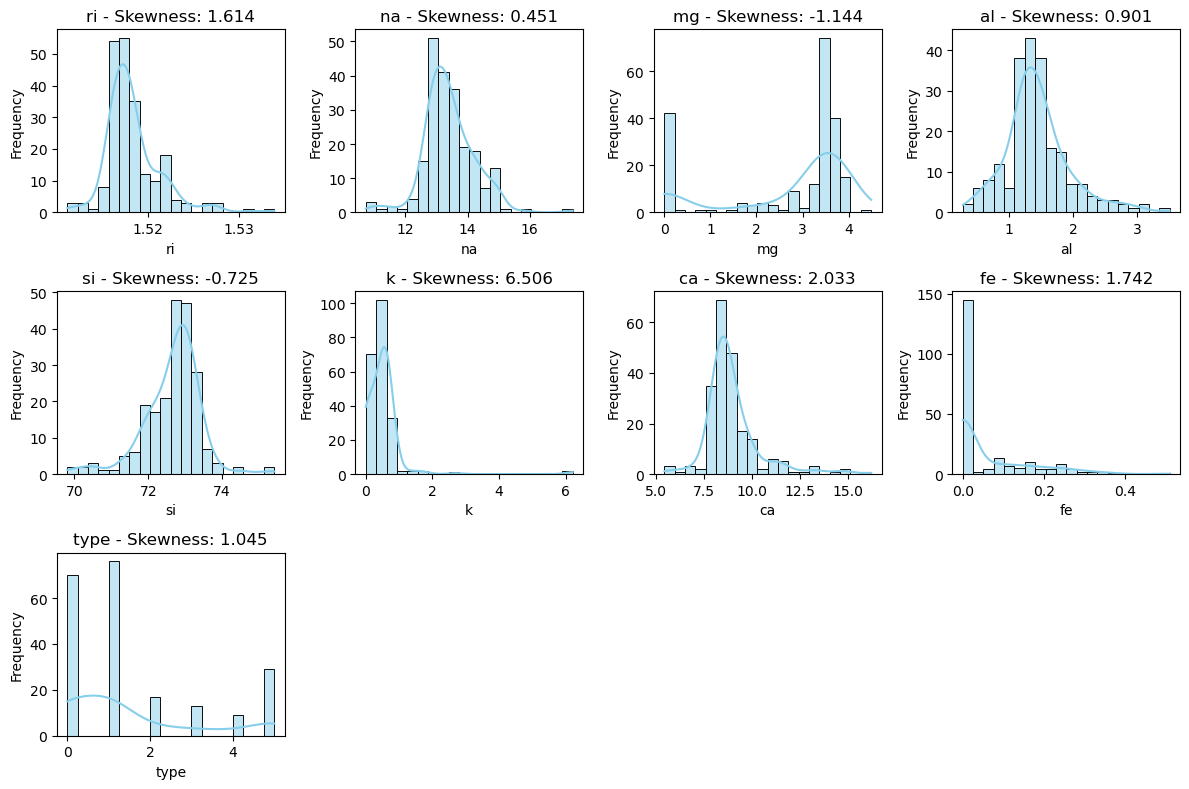

In [20]:
# plot skewness for each column
def plot_skewness(df_1):
    plt.figure(figsize=(12, 8))
   
    # Loop through each column 
    for i, columns in enumerate(df_1.columns):
        plt.subplot(3, 4, i + 1)  
        sns.histplot(df_1[columns], kde=True, bins=20, color='skyblue')
       
        # Calculate skewness for the column
        column_skew = skew(df_1[columns])
       
        # Title and annotation for skewness
        plt.title(f'{columns} - Skewness: {column_skew:.3f}')
        plt.xlabel(columns)
        plt.ylabel('Frequency')
   
    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Plot skewness for all columns
plot_skewness(df_1)

## Replace Outliers

In [21]:
# ri - 5 extreme outliers - Median
# na - 1 extreme outliers -  mean
# mg - 
# al - 3 extreme outliers -  mean
# si - 1 extreme outliers -  mean
# k - 3 extreme outliers -  30 zero values - Median
# ca - 10 extreme outliers - Median
# fe - 1 extreme outliers - 144 zero values- Median

In [22]:
# replace outliers with median
for col in ['ri', 'k', 'fe','ca']:
    med_val = df_1[col].median()
    df_1[col] = df_1[col].apply(lambda x: med_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)


# Replace outliers in specified columns with mean
for col in ['na', 'al', 'si']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)

df_1.describe()

,ri,na,mg,al,si,k,ca,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518089,13.389289,2.684533,1.420489,72.664210,0.434182,8.749579,0.054626,1.542056
std,0.002464,0.769688,1.442408,0.453046,0.749568,0.303625,0.918422,0.092415,1.707648
min,1.511150,10.730000,0.000000,0.290000,69.890000,0.000000,5.790000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.290000,0.122500,8.247500,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.552500,8.600000,0.000000,1.000000
75%,1.519038,13.807500,3.600000,1.620000,73.087500,0.600000,9.037500,0.097500,2.000000
max,1.526670,15.790000,4.490000,2.880000,75.410000,1.760000,11.640000,0.370000,5.000000


In [23]:
# Check again for Outliers to see if any remain as bounds may have shifted
# Loop through each column to calculate IQR and identify extreme outliers
for column in df_1.columns:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"skewness for {column}: {skewness}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)

ri
lower bound: 1.5089774999999999
upper bound: 1.5265825000000002
skewness for ri: 0.793287706658516
Outliers in ri:
          ri     na   mg    al     si     k    ca   fe  type
47   1.52667  13.99  3.7  0.71  71.57  0.02  9.82  0.1     0
110  1.52664  11.23  0.0  0.77  73.21  0.00  8.60  0.0     1
--------------------------------------------------
na
lower bound: 10.2075
upper bound: 16.5075
skewness for na: -0.035932045011622
Outliers in na:
Empty DataFrame
Columns: [ri, na, mg, al, si, k, ca, fe, type]
Index: []
--------------------------------------------------
mg
lower bound: -2.340000000000001
upper bound: 8.055000000000001
skewness for mg: -1.1525593175802356
Outliers in mg:
Empty DataFrame
Columns: [ri, na, mg, al, si, k, ca, fe, type]
Index: []
--------------------------------------------------
al
lower bound: -0.10000000000000053
upper bound: 2.9100000000000006
skewness for al: 0.5293258932775599
Outliers in al:
Empty DataFrame
Columns: [ri, na, mg, al, si, k, ca, fe, type]


In [24]:
# Skewness has shifted so I will replace the remaining outliers in line with new skewness (mean)
# Replace outliers in specified columns with mean
for col in ['ri', 'si', 'ca']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)

#Check outliers again to see if bounds shifting created more
for column in ['ri', 'si', 'ca']:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"skewness for {column}: {skewness}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)

ri
lower bound: 1.5091949999999996
upper bound: 1.5262925000000005
skewness for ri: 0.5787549329212347
Outliers in ri:
Empty DataFrame
Columns: [ri, na, mg, al, si, k, ca, fe, type]
Index: []
--------------------------------------------------
si
lower bound: 70.02749999999995
upper bound: 75.38250000000005
skewness for si: -0.45352034230822486
Outliers in si:
          ri        na   mg    al     si    k    ca   fe  type
184  1.51115  13.40785  0.0  0.34  75.41  0.0  6.65  0.0     4
--------------------------------------------------
ca
lower bound: 6.1424999999999965
upper bound: 11.112500000000002
skewness for ca: 0.8910577896870236
Outliers in ca:
          ri     na    mg    al     si     k     ca    fe  type
130  1.52177  13.75  1.01  1.36  72.19  0.33  11.14  0.00     1
169  1.51994  13.27  0.00  1.76  73.03  0.47  11.32  0.00     3
175  1.52119  12.97  0.33  1.51  73.39  0.13  11.27  0.28     3
183  1.51969  14.56  0.00  0.56  73.48  0.00  11.22  0.00     4
----------------------

In [25]:
# Still mean for si and ca - re-run
# Replace outliers in specified columns with mean
for col in ['si', 'ca']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)


for column in ['si', 'ca']:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"skewness for {column}: {skewness}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)

si
lower bound: 70.04999999999997
upper bound: 75.35250000000002
skewness for si: -0.7297420435970599
Outliers in si:
Empty DataFrame
Columns: [ri, na, mg, al, si, k, ca, fe, type]
Index: []
--------------------------------------------------
ca
lower bound: 6.314999999999994
upper bound: 10.882500000000006
skewness for ca: 0.4907904704419645
Outliers in ca:
          ri     na   mg    al     si    k     ca   fe  type
109  1.51818  13.72  0.0  0.56  74.45  0.0  10.99  0.0     1
--------------------------------------------------


In [26]:
# Replace outliers in specified columns with mean
for col in ['ca']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)


for column in ['ca']:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"Outliers in {column}:")
    print(f"skewness for {column}: {skewness}")
    print(outliers[column])
    print("-" * 50)

ca
lower bound: 6.367499999999994
upper bound: 10.812500000000005
Outliers in ca:
skewness for ca: 0.3743974094483944
          ri     na   mg    al     si    k     ca   fe  type
182  1.51916  14.15  0.0  2.09  72.74  0.0  10.88  0.0     4
--------------------------------------------------


In [27]:
# Replace outliers in specified columns with mean
for col in ['ca']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)


for column in ['ca']:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"skewness for {column}: {skewness}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)

ca
lower bound: 6.397499999999994
upper bound: 10.772500000000006
skewness for ca: 0.2553563012117775
Outliers in ca:
         ri     na   mg    al     si     k     ca   fe  type
104  1.5241  13.83  2.9  1.17  71.15  0.08  10.79  0.0     1
--------------------------------------------------


In [28]:
# Replace outliers in specified columns with mean
for col in ['ca']:
    mean_val = df_1[col].mean()
    df_1[col] = df_1[col].apply(lambda x: mean_val if x < df_1[col].quantile(0.25) - 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) or x > df_1[col].quantile(0.75) + 3*(df_1[col].quantile(0.75)-df_1[col].quantile(0.25)) else x)


for column in ['ca']:
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
   
    # Identify extreme outliers
    outliers[column] = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)]

    #identify skewness 
    skewness = df_1[column].skew()
    
    # Print outliers for each column (optional)
    print(f"{column}")
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")
    print(f"skewness for {column}: {skewness}")
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("-" * 50)

ca
lower bound: 6.419999999999995
upper bound: 10.742500000000005
skewness for ca: 0.130429985627489
Outliers in ca:
Empty DataFrame
Columns: [ri, na, mg, al, si, k, ca, fe, type]
Index: []
--------------------------------------------------


## Build Model: Dense Neural Network

In [29]:
# Split features and target variable

X = df_1.drop('type', axis=1)
y = df_1['type']

In [30]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
#not acceptiong reshape code so change to numpy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [32]:
#One hot encoding on multiclass target variable
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1,1))
y_test_encoded = encoder.transform(y_test.reshape(-1,1))


In [33]:
# Build the model
def build_dens_model():
    model = Sequential()

    ## First hidden layer with ReLU Activation and regularization
    model.add(layers.Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01))) 
                              
    # Add dropout layer
    model.add(layers.Dropout(0.2))

    #Add second layer
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # Second hidden layer 
    
    # Add dropout layer
    model.add(layers.Dropout(0.2))
    
    #Add Output layer 
    model.add(layers.Dense(6, activation='softmax')) # 6 outputs for 6 classes 

    #Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [34]:
# Build
model = build_dens_model()

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,854 (11.15 KB)

 Trainable params: 2,854 (11.15 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Train the model
model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2,callbacks=None)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.1624 - loss: 11.8055 - val_accuracy: 0.2333 - val_loss: 2.7588
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2174 - loss: 10.3936 - val_accuracy: 0.2333 - val_loss: 3.9453
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2942 - loss: 8.3741 - val_accuracy: 0.2333 - val_loss: 4.6094
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2790 - loss: 8.0862 - val_accuracy: 0.2333 - val_loss: 4.8759
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2415 - loss: 8.6278 - val_accuracy: 0.2333 - val_loss: 4.7990
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2693 - loss: 7.9213 - val_accuracy: 0.2333 - val_loss: 4.8299
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2926 - loss: 8.1404 - val_accuracy: 0.2333 - val_loss: 5.0953
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2858 - loss: 6.6651 - val_accuracy: 0.2333 - val_los

In [36]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print('\nTest accuracy:', test_acc)

3/3 - 0s - 9ms/step - accuracy: 0.2923 - loss: 1.7699

Test accuracy: 0.29230770468711853


In [37]:
# Make predictions
y_pred_s = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [38]:
# Classification Report of initial model
y_pred_class = np.argmax(y_pred_s, axis=1) 
y_test_class = np.argmax(y_test_encoded,  axis=1)

cls_report_initial = classification_report(y_test_class, y_pred_class, output_dict=True)
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.29      1.00      0.45        19
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        10

    accuracy                           0.29        65
   macro avg       0.05      0.17      0.08        65
weighted avg       0.09      0.29      0.13        65



## Scale and SMOTE before re-applying Model

In [39]:
## Scale the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

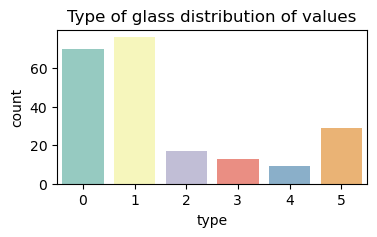

In [40]:
# check 'type' column for imbalance

type_imb = df_1['type']

plt.figure(figsize=(4,2))
sns.countplot(x=type_imb, data=df_1, palette = 'Set3')
plt.title("Type of glass distribution of values")
plt.show()

In [41]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_s, y_train_s = smote.fit_resample(X_train_scaled, y_train)

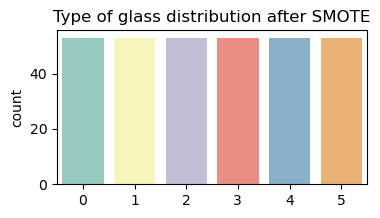

In [42]:
# check 'type' column after SMOTE

type_imb = df_1['type']

plt.figure(figsize=(4,2))
sns.countplot(x=y_train_s, palette = 'Set3')
plt.title("Type of glass distribution after SMOTE")
plt.show()

In [43]:
#One hot encode again
y_train_s_encoded = encoder.fit_transform(y_train_s.reshape(-1, 1))


In [44]:
# Build the model
def build_dens_model():
    model = Sequential()

    ## First hidden layer with ReLU Activation and regularization
    model.add(layers.Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01))) 
                              
    # Add dropout layer
    model.add(layers.Dropout(0.2))

    #Add second layer
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # Second hidden layer 
    
    # Add dropout layer
    model.add(layers.Dropout(0.2))
    
    #Add Output layer 
    model.add(layers.Dense(6, activation='softmax')) # 6 outputs for 6 classes 

    #Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [45]:
# Build
model = build_dens_model()

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,854 (11.15 KB)

 Trainable params: 2,854 (11.15 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [47]:
# Train the model
model.fit(X_train_s, y_train_s_encoded, epochs=500, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.2230 - loss: 2.3851 - val_accuracy: 0.3438 - val_loss: 2.1621
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2931 - loss: 2.2486 - val_accuracy: 0.4688 - val_loss: 2.1033
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3301 - loss: 2.1672 - val_accuracy: 0.5000 - val_loss: 2.0128
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4097 - loss: 2.0679 - val_accuracy: 0.5156 - val_loss: 1.9409
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4818 - loss: 2.0175 - val_accuracy: 0.6250 - val_loss: 1.8711
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4774 - loss: 1.9402 - val_accuracy: 0.6875 - val_loss: 1.7936
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5250 - loss: 1.8667 - val_accuracy: 0.6875 - val_loss: 1.7247
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5637 - loss: 1.7486 - val_accuracy: 0.6875 - val_loss: 1

In [48]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded, verbose=2)
print('\nTest accuracy:', test_acc)

3/3 - 0s - 74ms/step - accuracy: 0.6923 - loss: 1.1265

Test accuracy: 0.692307710647583


In [49]:
# Make predictions
y_pred = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [50]:
# Classification Report prior after 
y_pred_s = np.argmax(y_pred, axis=1) 
y_test_s = np.argmax(y_test_encoded,  axis=1)

cls_report_smote = classification_report(y_test_s, y_pred_s, output_dict=True)
print(classification_report(y_test_s, y_pred_s))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.74      0.61      0.67        23
           2       0.50      0.50      0.50         4
           3       0.71      0.83      0.77         6
           4       0.33      0.33      0.33         3
           5       0.89      0.80      0.84        10

    accuracy                           0.69        65
   macro avg       0.64      0.64      0.64        65
weighted avg       0.70      0.69      0.69        65



## GridsearchCV

In [51]:
param_grid = {
    'model__activation': ['relu', 'tanh','sigmoid','selu','elu','softmax'], # activation function
    'model__neurons':[32, 64, 128, 256, 512], # Wider range
    'model__optimizer': ['adam', 'sgd'] # optimizers
    }

In [52]:
# Build the model
def build_dens_model(activation=param_grid, optimizer=param_grid,neurons=param_grid, dropout_rate=0.2, l2_rate=0.01):
    model = Sequential()

    ## First hidden layer 
    model.add(layers.Dense(neurons, input_dim=X_train_s.shape[1], activation=activation, kernel_regularizer=regularizers.l2(l2_rate))) 
                              
    # Add dropout layer
    model.add(layers.Dropout(dropout_rate))

    #Add second layer
    model.add(layers.Dense(neurons, activation=activation,
                          kernel_regularizer=regularizers.l2(l2_rate))) # Second hidden layer 
    
    # Add dropout layer
    model.add(layers.Dropout(dropout_rate))
    
    #Add Output layer
    model.add(layers.Dense(6, activation='softmax')) # 6 outputs for 6 classes 

    
    #Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [53]:
# Wrap the model with KerasClassifier
keras_model = KerasClassifier(build_fn=build_dens_model, epochs=500, batch_size=32, verbose=0)

In [54]:
#set up GridSearchCV with a Stratified Fold 
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)
grid_search = GridSearchCV(estimator = keras_model, param_grid = param_grid, cv = cv, n_jobs = -1, verbose = 1, scoring='accuracy')

In [55]:
# fit the model with GridSearchCV
grid_search.fit(X_train_s, y_train_s_encoded,callbacks=[early_stopping])


# Print best parameters from GridSearchCV
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy (cv): {grid_search.best_score_}")

#Evaluate the best model on the test set
best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test_scaled, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparameters: {'model__activation': 'relu', 'model__neurons': 128, 'model__optimizer': 'adam'}
Best Accuracy (cv): 0.828125
Test Accuracy: 0.6462


In [56]:
y_pred_gs = best_model.predict(X_test_scaled)

# Classification Report after to GridSearch
y_pred_grid = np.argmax(y_pred_gs, axis=1) 

# Convert true labels from one hot coding to class labels
y_test_grid = np.argmax(y_test_encoded,  axis=1)

cls_report_best = classification_report(y_test_grid, y_pred_grid, output_dict=True)
print(classification_report(y_test_grid, y_pred_grid))

              precision    recall  f1-score   support

           0       0.64      0.74      0.68        19
           1       0.65      0.57      0.60        23
           2       0.67      0.50      0.57         4
           3       0.67      0.67      0.67         6
           4       0.33      0.33      0.33         3
           5       0.73      0.80      0.76        10

    accuracy                           0.65        65
   macro avg       0.61      0.60      0.60        65
weighted avg       0.65      0.65      0.64        65



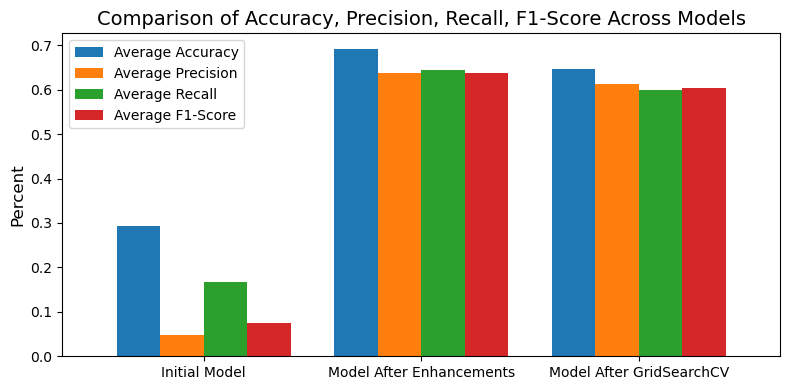

In [57]:

# To create the graph I need to find average scores
def extract_metrics(report):
    accuracy = report['accuracy']
    
    avg_precision = report['macro avg']['precision']
    avg_recall = report['macro avg']['recall']
    avg_f1 = report['macro avg']['f1-score']
    
    return accuracy, avg_precision, avg_recall, avg_f1

accuracy_initial, precision_initial, recall_initial, f1_initial = extract_metrics(cls_report_initial)
accuracy_smote, precision_smote, recall_smote, f1_smote = extract_metrics(cls_report_smote)
accuracy_grid, precision_grid, recall_grid, f1_grid = extract_metrics(cls_report_best)

# Create a dataframe with the metrics
df_comparison = pd.DataFrame({
    'Model': ['Initial Model', 'Model After Enhancements', 'Model After GridSearchCV'],
    'Average Accuracy': [accuracy_initial, accuracy_smote, accuracy_grid],
    'Average Precision': [precision_initial, precision_smote, precision_grid],
    'Average Recall': [recall_initial, recall_smote, recall_grid],
    'Average F1-Score': [f1_initial, f1_smote, f1_grid]
})

# Plotting the comparison of models
df_comparison.set_index('Model').plot(kind='bar', figsize=(8, 4), width=0.8,)

# Title and labels
plt.title('Comparison of Accuracy, Precision, Recall, F1-Score Across Models', fontsize=14)
plt.ylabel('Percent', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

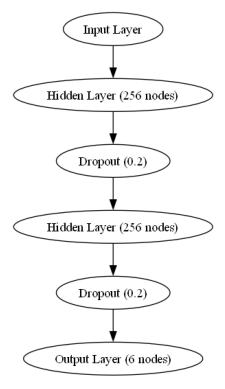

In [59]:
# Visualization of the model architecture using Graphviz
def visualize_model(best_model):
    dot = Digraph()

    # Add layers
    dot.node('Input', 'Input Layer')
    dot.node('Dense1', 'Hidden Layer (256 nodes)')
    dot.node('Dropout1', 'Dropout (0.2)')
    dot.node('Dense2', 'Hidden Layer (256 nodes)')
    dot.node('Dropout2', 'Dropout (0.2)')
    dot.node('Output', 'Output Layer (6 nodes)')

    # Define connections (edges)
    dot.edge('Input', 'Dense1')
    dot.edge('Dense1', 'Dropout1')
    dot.edge('Dropout1', 'Dense2')
    dot.edge('Dense2', 'Dropout2')
    dot.edge('Dropout2', 'Output')

    # Render the graph
    dot.render('model_architecture', format='png', cleanup=True)
    return 'model_architecture.png'

# Call the function to generate the architecture diagram
visualize_model(best_model)

# Display the generated image
img = plt.imread('model_architecture.png')
plt.imshow(img)
plt.axis('off')
plt.show()